# TensorFlow

是一個由Google Brain團隊開發，用於Google的研究和生產。為一種開源軟體庫，用於各種感知和語言理解任務的機器學習。https://www.tensorflow.org/


## 機器學習-神經網路(多層感知機 Multilayer perceptron, MLP)

感知器是人類對生物神經系統的一種人工模擬，最早在1957年Cornell大學航空實驗室工作時所發明，可以用來識別英文字母，預測天氣與分析心電圖等。


多層感知器是一種前向傳遞類神經網路，至少含有三層結構（輸入層、隱藏層和輸出層）。在目前深度學習的發展，MLP其實是深度神經網路（deep neural network,DNN）的一種special case。

https://zh.wikipedia.org/wiki/%E5%A4%9A%E5%B1%82%E6%84%9F%E7%9F%A5%E5%99%A8

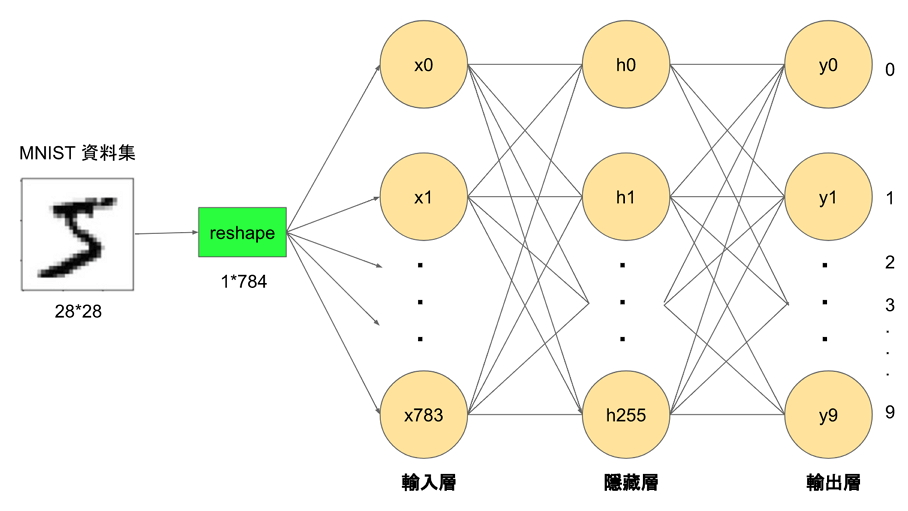

以多層感知器 MLP 構成之類神經網路會從輸入資料的特徵值 (features) 與對應之標籤 (labels) 學習, 具體過程就是透過自動調整權重設定來學習 features 與 labels 的對應關係, 因此 MLP 屬於機器學習中的監督式學習. 經過學習而得之權重網路會對沒有 labels 的測試資料做出預測 (predicts), 類似大腦皮質的特徵映射功能. 注意, 每個神經元還包含一個調整激活程度的偏權值 (bias) 參數, 但上面的 MLP 結構並未顯示。

以多層感知器對 MNIST 資料集進行手寫辨識測試的程序如下 :

##### 1.Features資料預處理：

預處理過程包括features(數字圖片)與labels(答案標籤)兩部份。在MNIST資料集中的圖片解析度皆是28x28 的數字資料（陣列），而MLP多層感知器是針對圖片的每一個畫素進行學習，因此必須將圖片的陣列轉換成 1x784的一維陣列（向量）會比較好處理。

圖片的預處理將陣列轉成向量可以使用Numpy的reshape()的函數來處理。

先載入MNIST資料集：

In [27]:
from keras.utils import np_utils         #匯入 Keras 的 Numpy 工具
import numpy as np                       #匯入 Numpy
np.random.seed(10)                       #設定隨機種子, 以便每次執行結果相同
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
#匯入 mnist 模組後載入資料集
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label)=mnist.load_data()

為了方便觀看預測的結果，可以使用matplotlib繪製圖形。matplotlib.pyplot 的 subplot() 來繪製 1 列 2 行的左右子圖, 左方是準確度子圖; 右方則是誤差子圖. 呼叫 plot() 繪製子圖前需先用 subplot() 指定是要繪製之子圖位置, 傳入值是一個三位數的整數, 例如 121 表示是 1 列 2 行中的第 1 行位置; 而 122 則是 1 列 2 行中的第 2 行位置。

參考：http://onionys.blogspot.com/2012/01/python-matplotlib.html

In [28]:
def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    plt.plot(train_history.history["acc"])
    plt.plot(train_history.history["val_acc"])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(train_history.history["loss"])
    plt.plot(train_history.history["val_loss"])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

首先看看訓練集的第一個樣本圖片x_train_image[0] 及其對應的標籤 y_train_label[0] :

In [4]:
x_train_image[0]             #訓練集的第一個樣本圖片 (2 維陣列)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train_label[0]#第一個樣本圖片對應的標籤為 5

5

可以看到圖片樣本中，畫素亮度，０為亮點，255為暗點，0~255之間為灰階，那我們所看到第一張圖片所對應的標籤為5。

那接下來要用 Numpy 的 reshape() 將訓練與測試樣本圖片的二維陣列都轉成 1 維向量, 其中訓練樣本有 6 萬個, 測試樣本有 1 萬個。接著是呼叫 astype() 將數值型態轉成 32-bit 浮點數, 方便後面正規化 :

In [6]:
x_train=x_train_image.reshape(60000,784).astype('float32')#轉成 1 維向量
x_test=x_test_image.reshape(10000,784).astype('float32')#轉成 1 維向量
x_train[0]#訓練集的第一個樣本圖片 (轉成 1*784 的一維向量)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

我們可以看到圖片樣本已經轉成一維陣列了，那為了提高訓練模型的精確度，必須將此一維向量正規化 (normalization), 正規化可以用值域的最大值, 或者整體平均值做分母去除, 此處用除以最大值的方式, 這樣原來 0~255 的像素值就變成 0~1 之間了 :

In [7]:
x_train_normalize=x_train/255      #訓練樣本除以最大值正規化
x_test_normalize=x_test/255           #測試樣本除以最大值正規化
x_train_normalize[0]                       #訓練樣本的第一個正規化圖片

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

以上features的預處理部分已經完成。

##### 2.Labels資料預處理

從剛才的 y_train_label 指令中可以看到，訓練樣本中的標籤只是介於0~9的整數，但MLP每個神經元的輸出是0或1，所以在辨識完後輸出的標示是0~9的10個神經元，因此原始的樣本標籤數值須經過 One-hot encoding 編碼 (獨熱編碼)，例如第一個訓練樣本的標籤為 5，則經過 One-hot encoding 之後變成 0000100000， 亦即只有第五個 bit 為 1，其餘 bits 均為 0。

參考：https://read01.com/zh-tw/5M32Jn.html#.W0b-i9j-i8V

One-hot encoding 最常用來表示類別型變數 (Categorical variables)，又稱為虛擬變數。 在 Numpy 中 One-hot encoding 是透過 to_categorical() 函數達成 :

In [8]:
y_train_onehot=np_utils.to_categorical(y_train_label)    #訓練樣本之標籤編碼
y_test_onehot=np_utils.to_categorical(y_test_label)         #測試樣本之標籤編碼
y_train_label[0]                #訓練樣本的第一個標籤為 5 (原始標籤)

5

In [9]:
y_train_onehot[0]             #訓練樣本的第一個標籤編碼後 (One-hot)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

##### 3.建立MLP模型

按照上面的MLP多重感知器的結構可以知道，每層神經元是一層一層堆疊起來的，所以我們要從 keras.models 匯入Sequential 模組，並在從 keras.layers 匯入 Dense 模組（緊密連接），首先我們先呼叫 Sequential() 建立線性堆疊模組：model=Sequential()

然後我們要利用 model.add() 方法依序將輸入層-隱藏層，以及隱藏層-輸出層的神經元連接網路逐一加入網路中。

model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

Dense 建立的網路其上下層是完全連接的。

In [10]:
from keras.models import Sequential    #匯入線性堆疊模型之模組
from keras.layers import Dense              #匯入緊密連接模組

In [12]:
model=Sequential()                                   #建立線性堆疊模型
model.add(Dense(units=256,                           #建立輸入層至隱藏層連接
                input_dim=784,                       #輸入神經元數目=784
                kernel_initializer='normal',         #以常態分佈亂數初始化參數
                activation='relu'))                  #使用 ReLu 激活函數
model.add(Dense(units=10,                            #建立隱藏層至輸出層連接
                kernel_initializer='normal',         #以常態分佈亂數初始化參數
                activation='softmax'))               #使用 SoftMax 激活函數

上面第二個 add() 在建立輸出層時可以省略 input_dim 參數, 因為 keras 會自動以上一層 (隱藏層) 的 unit=256 當作其輸入神經元之數目. 注意, 建立隱藏層時使用的激活函數 (activation function) 是 ReLu (整流線性單元, REctified Linear Unit); 而建立輸出層使用的激活函數則是 SoftMax. 關於 SoftMax 激活函數參考 :

# https://zh.wikipedia.org/wiki/Softmax函数

建好模型後呼叫 summary() 函數會顯示摘要 :

In [13]:
model.summary()                                      #顯示模型的摘要

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


摘要表顯示兩層權重網路的輸出神經元與參數的數目

dense_1 層 : 輸入-隱藏層, 有 256 個神經元與 200960 個參數 (=784*256+256)

dense_2 層 : 隱藏-輸出層, 有 10 個神經元與 2570 個參數 (=256*10+10)

全部參數合計為 200960+2570=203530 個, 這是根據上面 MLP 架構得到的 :

輸入層至隱藏層 (dense_1) : h1=relu(X*W1+b1)

隱藏層至輸出層 (dense_2) : y=softmax(h1*W2+b2)

X : 輸入層矩陣
W1 : 輸入層至隱藏層權值參數矩陣
b1 : 隱藏層的偏權值參數矩陣
h1 : 隱藏層輸出矩陣
W2 : 隱藏層至輸出層權值參數矩陣
b2 : 輸出層的偏權值參數矩陣

因為隱藏層有 256 個神經元, 因此就有 256 個偏權值參數; 而輸出層有 10 個神經元, 因此就有 10 個偏權值參數.

#### 4.訓練 MLP 模型

建好 MLP 模型後就可以用 MNIST 資料集來訓練此模型. 進行訓練之前必須先用 compile() 函數設定模型 :

In [14]:
model.compile(loss='categorical_crossentropy',       #設定損失函數
              optimizer='adam',                      #設定最佳化方法
              metrics=['accuracy'])                  #設定評估模型之方式

這裡要設定 MLP 模型的三個參數 :

loss : 設定損失函數
optimizer : 最佳化方法
metrics : 評估模型之方式


呼叫 fit() 函數即開始訓練模型 :

In [22]:
train_history = model.fit(x = x_train_normalize,     #正規化的訓練樣本圖片
                          y=y_train_onehot,          #One-hot 編碼
                        validation_split = 0.2,      #分出 20% 做驗證
                        epochs = 10,                 #設定訓練週期 (輪)
                        batch_size = 200,            #每批次訓練筆數
                        verbose = 2)                 #=2 顯示訓練過程

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.0261 - acc: 0.9935 - val_loss: 0.0841 - val_acc: 0.9752
Epoch 2/10
 - 1s - loss: 0.0219 - acc: 0.9949 - val_loss: 0.0839 - val_acc: 0.9764
Epoch 3/10
 - 1s - loss: 0.0184 - acc: 0.9961 - val_loss: 0.0794 - val_acc: 0.9766
Epoch 4/10
 - 2s - loss: 0.0153 - acc: 0.9970 - val_loss: 0.0829 - val_acc: 0.9766
Epoch 5/10
 - 2s - loss: 0.0128 - acc: 0.9978 - val_loss: 0.0808 - val_acc: 0.9776
Epoch 6/10
 - 1s - loss: 0.0105 - acc: 0.9985 - val_loss: 0.0788 - val_acc: 0.9788
Epoch 7/10
 - 1s - loss: 0.0090 - acc: 0.9987 - val_loss: 0.0831 - val_acc: 0.9782
Epoch 8/10
 - 1s - loss: 0.0075 - acc: 0.9991 - val_loss: 0.0806 - val_acc: 0.9777
Epoch 9/10
 - 1s - loss: 0.0064 - acc: 0.9993 - val_loss: 0.0819 - val_acc: 0.9776
Epoch 10/10
 - 2s - loss: 0.0054 - acc: 0.9995 - val_loss: 0.0839 - val_acc: 0.9778


其中前兩個參數分別傳入正規化的訓練樣本數字圖片向量與其對應之 One-hot 編碼標籤. validation_split (0~1) 是設定要從訓練資料中分出多少比率做驗證, 0.2 表示從 60000 筆訓練樣本中分割出 20% 即 60000*0.2=12000 筆作驗證, 而其餘 80% 即 60000*0.8=48000 做訓練. epochs 用來設定整個訓練要跑幾輪, 而 batch_size 則是每個批次要取多少筆資料來訓練, 亦即 fit() 並非將 60000 筆訓練資料一次跑完, 而是一次跑 200 筆.

其中 loss 與 acc 分別為使用 80% 訓練樣本之損失與精確率; 而 val_loss 與 val_acc 分別為使用 20% 訓練樣本驗證之損失與精確率, 可見經過十輪訓練後兩部分的損失都越來越小; 而精確率則越來越高. 這十輪訓練的結果會以 dict 型態儲存在 train_history 變數的 history 屬性中, 可用 "loss", "acc", "val_loss", 與 "val_acc" 等 key 存取, 例如 :

In [23]:
train_history.history["loss"]

[0.026120230508968233,
 0.02191633021575399,
 0.018378572619985788,
 0.015347885939020974,
 0.012777945746590073,
 0.010453673079609871,
 0.00895595996795843,
 0.007530664979519012,
 0.006432811062162121,
 0.005387764409533702]

In [24]:
train_history.history["acc"]

[0.9935416728258133,
 0.994895838201046,
 0.9960833370685578,
 0.9970416694879531,
 0.9977916687726974,
 0.9985208347439766,
 0.9987083345651626,
 0.9991458341479301,
 0.9993333339691162,
 0.9995208337903023]

In [25]:
train_history.history["val_loss"] 

[0.08414275571703911,
 0.08385010299583276,
 0.07936192598814766,
 0.08293733659666032,
 0.08083039678943654,
 0.07880028932122514,
 0.08314046781354895,
 0.08056311211548746,
 0.08186456872693573,
 0.08389613593850906]

In [26]:
train_history.history["val_acc"]

[0.9751666744550069,
 0.976416677236557,
 0.9765833437442779,
 0.9765833437442779,
 0.9775833457708358,
 0.9787500123182933,
 0.9781666755676269,
 0.9776666760444641,
 0.9775833457708358,
 0.9777500132719675]

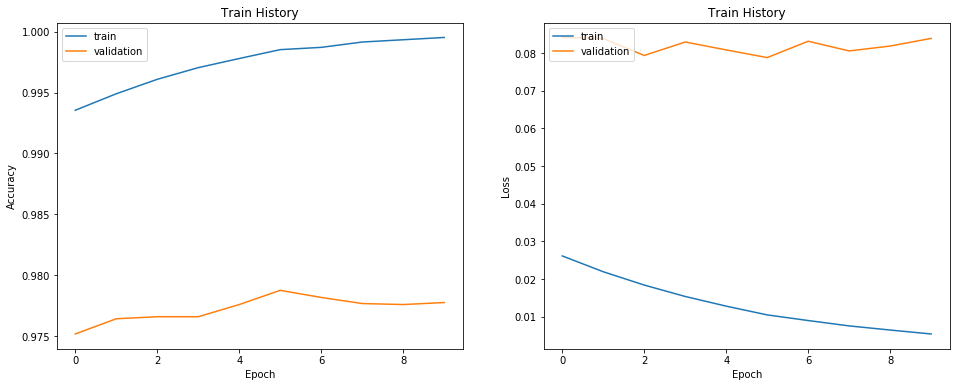

In [29]:
show_train_history(train_history)

#### 5.以測試樣本評估訓練後的 MLP 模型準確率 :

完成 MLP 模型之訓練後, 可將正規化後的數字圖片測試樣本與其 One-hot 編碼之測試標籤傳入 evaluate() 函數以評估模型的準確率 :

In [30]:
scores=model.evaluate(x_test_normalize, y_test_onehot)   #評估準確率
print("Accuracy=", scores[1])                            #顯示準確率

10000/10000 [==============================] - 0s 38us/step
Accuracy= 0.9799


In [35]:
prediction = model.predict_classes(x_test)   #預測測試樣本
print(prediction)                            #顯示預測結果

[7 2 1 ... 4 5 6]
